In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/sample_data/international_matches.csv')
dataset = dataset.dropna()
#dataset = dataset[dataset['home_team_result'] != 'Draw']

x = dataset[
[
 'home_team_fifa_rank',
 'away_team_fifa_rank',
 'home_team_total_fifa_points',
 'away_team_total_fifa_points',
 'home_team_goalkeeper_score',
 'away_team_goalkeeper_score',
 'home_team_mean_defense_score',
 'away_team_mean_defense_score',
 'home_team_mean_midfield_score',
 'away_team_mean_midfield_score',
 'home_team_mean_offense_score',
 'away_team_mean_offense_score'
]
]

y = dataset['home_team_result']
print(y.value_counts())

home_team_result
Win     1950
Lose    1263
Draw    1090
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.4099883855981417
Confusion Matrix:
 [[ 70  61  96]
 [ 85  83  85]
 [121  60 200]]
Classification Report:
               precision    recall  f1-score   support

        Draw       0.25      0.31      0.28       227
        Lose       0.41      0.33      0.36       253
         Win       0.52      0.52      0.52       381

    accuracy                           0.41       861
   macro avg       0.40      0.39      0.39       861
weighted avg       0.42      0.41      0.41       861



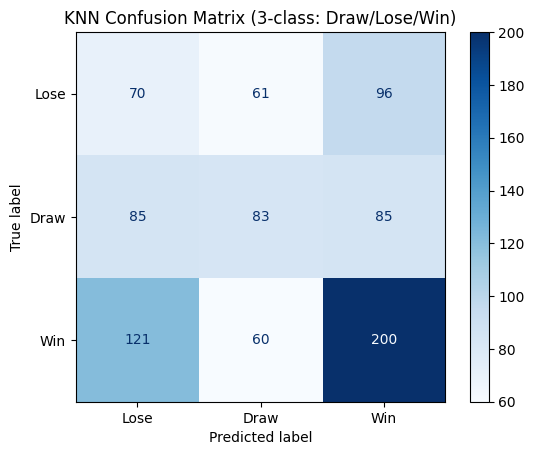

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


labels = ['Lose','Draw', 'Win']

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=labels
)

disp.plot(cmap='Blues', values_format='d')
plt.title("KNN Confusion Matrix (3-class: Draw/Lose/Win)")
plt.show()



---
---


**There are two evaluation **Paths** for using **KNN** with this dataset:**

# ***Path 1:***

* **Y =  Win | Draw | Lose**

* **test_size = 0.2**

* **K = 3**

***The results of these settings were:***

> **Accuracy** = 0.41

> Confusion Matrix:

     | 71  65  91  |

     | 95  66  92  |

     | 112 80 189  |

---

# ***Path 2:***

* **Y =  Win | Lose**

* **test_size = 0.2**

* **K = 3**

***The results of these settings were:***



> **Accuracy** = 0.68

> **Confusion Matrix:**

     | 135  107  |


     | 118  238  |

---

> **The conclusion to these trials is:**

    > KNN performance depended on the number of outcomes.
    
    > when the outcomes were ( Win | Draw | Lose ) the accuracy was 0.41.

    > when the outcomes werre binary ( Win | Lose ) the accuracy improved to 0.68.

    > Scaling is important for this dataset, because the huge scaling difference between some features.

    > Draw outcome is very hard to be predicted

---
---
